In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('data.csv',encoding= 'unicode_escape')

In [3]:
data.shape

(472, 116)

## Data manipilation

In [3]:
dataclean=pd.DataFrame()

In [4]:
col=list(data.columns)

In [5]:
col

['Company_Name',
 'Dependent-Company Status',
 'year of founding',
 'Age of company in years',
 'Internet Activity Score',
 'Short Description of company profile',
 'Industry of company',
 'Focus functions of company',
 'Investors',
 'Employee Count',
 'Employees count MoM change',
 'Has the team size grown',
 'Est. Founding Date',
 'Last Funding Date',
 'Last Funding Amount',
 'Country of company',
 'Continent of company',
 'Number of Investors in Seed',
 'Number of Investors in Angel and or VC',
 'Number of Co-founders',
 'Number of of advisors',
 'Team size Senior leadership',
 'Team size all employees',
 'Presence of a top angel or venture fund in previous round of investment',
 'Number of of repeat investors',
 'Number of  Sales Support material',
 'Worked in top companies',
 'Average size of companies worked for in the past',
 'Have been part of startups in the past?',
 'Have been part of successful startups in the past?',
 'Was he or she partner in Big 5 consulting?',
 'Consulti

In [6]:
data[col[0]]

0        Company1
1        Company2
2        Company3
3        Company4
4        Company5
          ...    
467    Company468
468    Company469
469    Company470
470    Company471
471    Company472
Name: Company_Name, Length: 472, dtype: object

In [7]:
del data['Company_Name']

In [8]:
data[col[1]]

0      Success
1      Success
2      Success
3      Success
4      Success
        ...   
467     Failed
468     Failed
469     Failed
470     Failed
471     Failed
Name: Dependent-Company Status, Length: 472, dtype: object

In [9]:
data[col[1]].value_counts()

Success    305
Failed     167
Name: Dependent-Company Status, dtype: int64

In [10]:
dataclean['label']=np.where(data[col[1]]=='Success',1,0)

In [11]:
data[col[2]].value_counts()

2010       76
2012       73
2011       70
No Info    59
2009       49
2007       42
2008       33
2005       23
2013       20
2006       14
2000        4
2002        3
2004        2
2003        2
1997        1
1999        1
Name: year of founding, dtype: int64

I believe 'year of founding' column don't have big effect on company success, because variation isn't so big. 

In [12]:
data[col[3]].value_counts()

4          76
2          73
3          70
5          49
7          42
6          33
9          23
1          20
No Info    15
8          14
14          4
12          3
10          2
11          2
17          1
15          1
Name: Age of company in years, dtype: int64

In [13]:
data[col[3]].isnull().sum()

44

In [14]:
dataclean['company years']=np.where(data[col[3]]=='No Info',np.nan,data[col[3]])

In [15]:
dataclean['company years']=pd.to_numeric(dataclean['company years'], errors='coerce')

filling nan values with mean values

In [16]:
dataclean['company years'].fillna((dataclean['company years'].mean()), inplace=True)

In [17]:
dataclean['company years'].isnull().sum()

0

In [18]:
data[col[4]]

0       -1.0
1      125.0
2      455.0
3      -99.0
4      496.0
       ...  
467     -5.0
468      NaN
469      0.0
470      0.0
471     11.0
Name: Internet Activity Score, Length: 472, dtype: float64

/Users/gurgenblbulyan/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/gurgenblbulyan/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


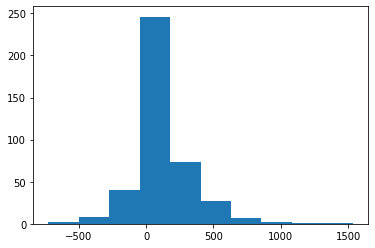

In [19]:
plt.hist(data[col[4]])
plt.show()

In [20]:
dataclean['internet activity']=pd.to_numeric(data[col[4]], errors='coerce')

In [21]:
dataclean['internet activity'].fillna((dataclean['internet activity'].mean()), inplace=True)

In [22]:
data[col[5]].value_counts()

Big Data Analytics                    4
Standard for reputation               2
Online wine service                   2
Social Media Analytics                2
Media Hosting                         2
                                     ..
Cloud computing                       1
energy efficiency data platform       1
Stunning Interactive Presentations    1
Human insight at machine scale        1
Smart Suggestions for Sales Reps      1
Name: Short Description of company profile, Length: 313, dtype: int64

This column isn't usfull

In [23]:
data[col[6]]

0                                                 NaN
1              Market Research|Marketing|Crowdfunding
2      Analytics|Cloud Computing|Software Development
3                                    Mobile|Analytics
4             Analytics|Marketing|Enterprise Software
                            ...                      
467                                        E-Commerce
468                                               NaN
469                              Analytics|E-Commerce
470                               Analytics|Marketing
471                              Analytics|Healthcare
Name: Industry of company, Length: 472, dtype: object

In [24]:
ne = data[col[6]].str.split("|", n = 6, expand = True) 

In [25]:
ne

,0,1,2,3,4,5,6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Market Research,Marketing,Crowdfunding,None,None,None,None
2,Analytics,Cloud Computing,Software Development,None,None,None,None
3,Mobile,Analytics,None,None,None,None,None
4,Analytics,Marketing,Enterprise Software,None,None,None,None
...,...,...,...,...,...,...,...
467,E-Commerce,None,None,None,None,None,None
468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
469,Analytics,E-Commerce,None,None,None,None,None
470,Analytics,Marketing,None,None,None,None,None


In [26]:
ne[0].value_counts()

Analytics                             124
E-Commerce                             38
Advertising                            23
Media                                  16
Mobile                                 15
Marketing                              15
Cloud Computing                        13
Network / Hosting / Infrastructure     10
Healthcare                              8
Search                                  7
Music                                   7
Software Development                    6
Human Resources (HR)                    6
Enterprise Software                     5
Entertainment                           5
Education                               5
Social Networking                       5
CleanTech                               4
Gaming                                  4
Security                                4
Retail                                  3
Market Research                         3
Email                                   3
Energy                            

In [27]:
onehot = pd.get_dummies(ne[0], prefix = 'industry')


In [28]:
onehot

,industry_Advertising,industry_Analytics,industry_Career / Job Search,industry_Classifieds,industry_CleanTech,industry_Cloud Computing,industry_E-Commerce,industry_Education,industry_Email,industry_Energy,...,industry_Retail,industry_Search,industry_Security,industry_Social Networking,industry_Software Development,industry_Space Travel,industry_Telecommunications,industry_Transportation,industry_Travel,industry_energy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
468,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
469,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
470,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
dataclean=dataclean.join(onehot)

In [30]:
data[col[7]].str.lower().value_counts()

marketing                   62
operations                  51
analytics                   33
operation                   25
technology                  21
                            ..
online music                 1
targeting                    1
data driven applications     1
operations, marketing        1
travel planning              1
Name: Focus functions of company, Length: 145, dtype: int64

In [31]:
data[col[7]].isnull().sum()

30

In [32]:
data[col[7]][:9]

0            operation
1     Marketing, sales
2           operations
3    Marketing & Sales
4    Marketing & Sales
5            analytics
6             Research
7            Computing
8            Marketing
Name: Focus functions of company, dtype: object

In [33]:
new = data[col[7]].str.split(",", n = 1, expand = True) 


In [34]:
new1=new[0].str.split("&", n = 1, expand = True)

In [35]:
set(new1[0].str.lower().values)

{'\\',
 'advertising',
 'analtics',
 'analytic',
 'analytics',
 'analytics crowdsourcing',
 'app',
 'app revenue',
 'application',
 'big data analytics',
 'billing',
 'bug fix',
 'campaign management',
 'cloud computing',
 'community betterment',
 'computing',
 'conssumer web',
 'consumer behaviour',
 'consumer web',
 'crm',
 'curated web',
 'customer analytics',
 'customer engagement',
 'customer retention',
 'customer servce',
 'customer service',
 'dashboards',
 'data collection',
 'data collection ',
 'data driven applications',
 'data integration',
 'data management',
 'data visualization',
 'database management',
 'development',
 'development tool',
 'e-learning',
 'ecommerce',
 'elearning',
 'energy saving',
 'enterprise',
 'entertainment',
 'finance',
 'game',
 'games',
 'global',
 'information management',
 'intellectual property analysis and visualisation',
 'inventory management',
 'iphone apps',
 'it ',
 'localized behaviour',
 'location based service',
 'mail reports',
 'm

In [36]:
new2=new[0].str.split(" ", n = 1, expand = True)

In [37]:
set(new2[0].str.lower().values)

{'\\',
 'advertising',
 'analtics',
 'analytic',
 'analytics',
 'app',
 'application',
 'big',
 'billing',
 'bug',
 'campaign',
 'cloud',
 'community',
 'computing',
 'conssumer',
 'consumer',
 'crm',
 'curated',
 'customer',
 'dashboards',
 'data',
 'database',
 'development',
 'e-learning',
 'ecommerce',
 'elearning',
 'energy',
 'enterprise',
 'entertainment',
 'finance',
 'game',
 'games',
 'global',
 'information',
 'intellectual',
 'inventory',
 'iphone',
 'it',
 'localized',
 'location',
 'mail',
 'malware',
 'management',
 'many',
 'marketiing',
 'marketing',
 'media',
 'merchandising',
 'metrics',
 'mobile',
 'mrkting',
 'music',
 'n',
 nan,
 'network',
 'networking',
 'news',
 'online',
 'operation',
 'operations',
 'optimization',
 'payment',
 'personal',
 'phone',
 'pricing',
 'privacy',
 'production',
 'publishing',
 'recommendation',
 'reporting',
 'research',
 'retail',
 'revenue',
 'risk',
 'sale',
 'sales',
 'search',
 'security',
 'server',
 'service',
 'social',
 'so

In [38]:
data[col[8]]

0      KPCB Holdings|Draper Fisher Jurvetson (DFJ)|Kl...
1                                                    NaN
2      TechStars|Streamlined Ventures|Amplify Partner...
3      Michael Birch|Max Levchin|Sequoia Capital|Keit...
4      DFJ Frontier|Draper Nexus Ventures|Gil Elbaz|A...
                             ...                        
467                                                  NaN
468                                                  NaN
469                                                  NaN
470                                                  NaN
471                         David Schafer|Bert Navarrete
Name: Investors, Length: 472, dtype: object

In [39]:
data[col[9]].value_counts()

0.0      23
1.0      18
6.0      17
4.0      16
5.0      13
         ..
172.0     1
57.0      1
410.0     1
594.0     1
297.0     1
Name: Employee Count, Length: 84, dtype: int64

In [40]:
v=np.where(data[col[9]]==0,np.nan,data[col[9]])

In [41]:
dataclean['employee count']=pd.to_numeric(v, errors='coerce')

In [42]:
dataclean['employee count'].fillna((dataclean['employee count'].median()), inplace=True)

In [43]:
dataclean['employee count'].value_counts()

14.0     198
1.0       18
6.0       17
4.0       16
5.0       13
        ... 
172.0      1
57.0       1
410.0      1
594.0      1
297.0      1
Name: employee count, Length: 83, dtype: int64

In [44]:
data[col[10]].value_counts()

 0.0      116
-100.0     13
 3.0       10
 4.0       10
 2.0        9
 7.0        9
 5.0        8
 8.0        8
 9.0        8
-4.0        7
 13.0       6
 6.0        5
 17.0       5
-7.0        4
 11.0       4
 20.0       4
 33.0       4
-2.0        3
-1.0        3
-5.0        3
 1.0        3
-13.0       2
 10.0       2
 14.0       2
-3.0        2
-6.0        2
 45.0       1
-12.0       1
-14.0       1
 40.0       1
 23.0       1
 29.0       1
 19.0       1
 50.0       1
 22.0       1
 25.0       1
 15.0       1
 12.0       1
-17.0       1
 24.0       1
-11.0       1
Name: Employees count MoM change, dtype: int64

In [45]:
dataclean['employee change']=data[col[10]].fillna(0)

In [46]:
data[col[11]].value_counts()

No         266
yes        101
Yes         47
YES          7
No Info      1
Name: Has the team size grown, dtype: int64

In [47]:
data[col[11]].str.lower().value_counts()

no         266
yes        155
no info      1
Name: Has the team size grown, dtype: int64

In [48]:
data[col[11]]=data[col[11]].replace('No Info',np.nan)

In [49]:
data[col[11]].str.lower().value_counts()

no     266
yes    155
Name: Has the team size grown, dtype: int64

In [50]:
dataclean['grown']=np.where(data[col[11]].str.lower()=='yes',1,0)

In [51]:
dataclean['grown'].value_counts()

0    317
1    155
Name: grown, dtype: int64

In [52]:
data[col[13]]

0       5/26/2013
1             NaN
2      10/23/2013
3       5/10/2012
4      12/11/2013
          ...    
467           NaN
468           NaN
469           NaN
470      2/1/2010
471      9/1/2013
Name: Last Funding Date, Length: 472, dtype: object

In [53]:
data[col[12]]

0            NaN
1            NaN
2      12/1/2011
3      6/20/2009
4       4/1/2010
         ...    
467     3/1/2011
468          NaN
469     5/1/2010
470    10/1/2009
471     7/1/2013
Name: Est. Founding Date, Length: 472, dtype: object

In [54]:
founding=pd.to_datetime(data[col[13]])-pd.to_datetime(data[col[12]])

In [55]:
founding.value_counts()

0 days       8
151 days     2
1449 days    2
244 days     2
1122 days    2
            ..
821 days     1
1300 days    1
1362 days    1
3092 days    1
1909 days    1
Length: 290, dtype: int64

In [56]:
a=np.array([])
for i in founding:
    a=np.append(a,i.days)

In [57]:
dataclean['founding diff']=a

In [58]:
dataclean['founding diff'].fillna((dataclean['founding diff'].mean()), inplace=True)

In [60]:
data[col[14]]

0        450000.0
1             NaN
2       2350000.0
3      10250000.0
4       5500000.0
          ...    
467           NaN
468           NaN
469           NaN
470      100000.0
471      120000.0
Name: Last Funding Amount, Length: 472, dtype: float64

In [61]:
data[col[14]].fillna((data[col[14]].mean()), inplace=True)

In [62]:
data[col[14]]

0      4.500000e+05
1      6.379489e+06
2      2.350000e+06
3      1.025000e+07
4      5.500000e+06
           ...     
467    6.379489e+06
468    6.379489e+06
469    6.379489e+06
470    1.000000e+05
471    1.200000e+05
Name: Last Funding Amount, Length: 472, dtype: float64

In [63]:
dataclean['last funding']=data[col[14]]

In [64]:
data[col[15]].value_counts()

United States         305
United Kingdom         33
India                  10
France                  8
Germany                 6
Belgium                 5
Spain                   5
Israel                  4
Bulgaria                3
Canada                  3
Denmark                 3
Finland                 2
Azerbaijan              2
Argentina               2
Switzerland             2
Austria                 2
Italy                   1
Czech Republic          1
Singapore               1
Sweden                  1
Russian Federation      1
Estonia                 1
Name: Country of company, dtype: int64

In [65]:
data[col[16]].value_counts()

North America    308
Europe            76
Asia              15
South America      2
Name: Continent of company, dtype: int64

In [66]:
data[col[16]].isnull().sum()

71

In [67]:
data[col[16]]=data[col[16]].replace('South America','North America')

In [68]:
data[col[16]].value_counts().index[0]

'North America'

In [69]:
data[col[16]]=data[col[16]].fillna(data[col[16]].value_counts().index[0])

In [302]:
dataclean=dataclean.join(pd.get_dummies(data[col[16]]))

In [303]:
dataclean

,label,company years,internet activity,industry_Advertising,industry_Analytics,industry_Career / Job Search,industry_Classifieds,industry_CleanTech,industry_Cloud Computing,industry_E-Commerce,...,industry_Travel,industry_energy,employee count,employee change,grown,founding diff,last funding,Asia,Europe,North America
0,1,4.605327,-1.000000,0,0,0,0,0,0,0,...,0,0,3.0,0.0,0,977.816199,4.500000e+05,0,0,1
1,1,3.000000,125.000000,0,0,0,0,0,0,0,...,0,0,14.0,0.0,0,977.816199,6.379489e+06,0,0,1
2,1,3.000000,455.000000,0,1,0,0,0,0,0,...,0,0,14.0,0.0,0,692.000000,2.350000e+06,0,0,1
3,1,5.000000,-99.000000,0,0,0,0,0,0,0,...,0,0,45.0,10.0,0,1055.000000,1.025000e+07,0,0,1
4,1,4.000000,496.000000,0,1,0,0,0,0,0,...,0,0,39.0,3.0,0,1350.000000,5.500000e+06,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,0,3.000000,-5.000000,0,0,0,0,0,0,1,...,0,0,14.0,0.0,0,977.816199,6.379489e+06,0,0,1
468,0,4.605327,114.159705,0,0,0,0,0,0,0,...,0,0,14.0,0.0,0,977.816199,6.379489e+06,0,0,1
469,0,4.000000,0.000000,0,1,0,0,0,0,0,...,0,0,14.0,0.0,0,977.816199,6.379489e+06,0,0,1
470,0,5.000000,0.000000,0,1,0,0,0,0,0,...,0,0,14.0,0.0,0,123.000000,1.000000e+05,0,0,1


In [71]:
data=data.replace('No Info',np.nan)

In [255]:
num1=data.iloc[:,16:22]

In [256]:
cat1=data.iloc[:,22:23]

In [257]:
num2=data.iloc[:,23:24]

In [258]:
cat2=data.iloc[:,24:59]

In [259]:
num3=data.iloc[:,59:60]

In [260]:
cat3=data.iloc[:,61:64]

In [261]:
num4=data.iloc[:,64:65]

In [262]:
cat4=data.iloc[:,65:70]

In [263]:
num5=data.iloc[:,70:71]

In [264]:
cat5=data.iloc[:,71:72]

In [265]:
num6=data.iloc[:,72:73]

In [266]:
cat6=data.iloc[:,73:86]

In [267]:
num7=data.iloc[:,86:87]

In [268]:
cat7=data.iloc[:,87:90]

In [269]:
num8=data.iloc[:,90:91]

In [270]:
cat8=data.iloc[:,91:92]

In [271]:
num9=data.iloc[:,92:95]

In [272]:
cat9=data.iloc[:,95:96]

In [273]:
num10=data.iloc[:,96:98]

In [274]:
cat10=data.iloc[:,98:100]

In [275]:
num11=data.iloc[:,98:]

In [304]:
v=num1.join([num2,num3,num4,num5,num6,num7,num8,num9,num10,num11])

In [305]:
le=list(v.columns)

In [306]:
for i in le:
    v[i]=pd.to_numeric(v[i], errors='coerce')

In [307]:
v.fillna(v.mean(),inplace=True)

In [308]:
v

,Number of Investors in Seed,Number of Investors in Angel and or VC,Number of Co-founders,Number of of advisors,Team size Senior leadership,Team size all employees,Number of of repeat investors,Years of education,Renowned in professional circle,Number of Recognitions for Founders and Co-founders,...,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,2.000000,0.000000,1,2,2,15.000000,4.000000,21.00000,500.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5.000000,0.000000,2,0,4,20.000000,0.000000,21.00000,500.000000,13.000000,...,8.823529,21.764706,10.882353,2.941176,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
2,15.000000,0.000000,3,0,7,10.000000,0.000000,18.00000,500.000000,18.000000,...,3.846154,17.094017,9.401709,0.000000,2.777778,0.000000,0.000000,0.000000,0.000000,9.000000
3,6.000000,0.000000,2,0,4,50.000000,0.000000,18.00000,469.055118,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
4,7.000000,0.000000,1,1,8,40.000000,0.000000,18.00000,500.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,0.000000,0.000000,0,0,1,69.485149,0.000000,19.99458,469.055118,72.265985,...,6.081920,10.981158,3.430098,3.357193,4.749903,0.199509,0.482063,1.591776,1.359155,3.291971
468,0.000000,4.000000,0,0,1,69.485149,0.000000,19.99458,469.055118,72.265985,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
469,1.546099,0.576832,2,0,1,69.485149,0.606481,19.99458,469.055118,72.265985,...,6.081920,10.981158,3.430098,3.357193,4.749903,0.199509,0.482063,1.591776,1.359155,3.291971
470,1.546099,0.576832,3,2,1,69.485149,0.606481,19.99458,469.055118,72.265985,...,6.081920,10.981158,3.430098,3.357193,4.749903,0.199509,0.482063,1.591776,1.359155,3.291971


In [286]:
w=cat1.join([cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10])

In [297]:
w.iloc[:,0].str.lower()

no     282
yes     93
Name: Presence of a top angel or venture fund in previous round of investment, dtype: int64

In [ ]:
data[col[16]]=data[col[16]].fillna(data[col[16]].value_counts().index[0])

In [313]:
w.columns

Index(['Presence of a top angel or venture fund in previous round of investment',
       'Number of  Sales Support material', 'Worked in top companies',
       'Average size of companies worked for in the past',
       'Have been part of startups in the past?',
       'Have been part of successful startups in the past?',
       'Was he or she partner in Big 5 consulting?', 'Consulting experience?',
       'Product or service company?',
       'Catering to product/service across verticals',
       'Focus on private or public data?', 'Focus on consumer data?',
       'Focus on structured or unstructured data',
       'Subscription based business',
       'Cloud or platform based serive/product?', 'Local or global player',
       'Linear or Non-linear business model',
       'Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive',
       'Number of  of Partners of company', 'Crowdsourcing based business',
       '

In [317]:
w['Presence of a top angel or venture fund in previous round of investment'].str.lower().fillna(w['Presence of a top angel or venture fund in previous round of investment'].value_counts().index[0])

0      yes
1       no
2       no
3      yes
4       no
      ... 
467     no
468     no
469     No
470     No
471     No
Name: Presence of a top angel or venture fund in previous round of investment, Length: 472, dtype: object

In [321]:
for i in list(w.columns):
    p=w[i].str.lower()
    h=p.fillna(p.value_counts().index[0])
    r=pd.get_dummies(h,prefix=i)
    dataclean=dataclean.join(r)

In [318]:
dataclean

,label,company years,internet activity,industry_Advertising,industry_Analytics,industry_Career / Job Search,industry_Classifieds,industry_CleanTech,industry_Cloud Computing,industry_E-Commerce,...,industry_Travel,industry_energy,employee count,employee change,grown,founding diff,last funding,Asia,Europe,North America
0,1,4.605327,-1.000000,0,0,0,0,0,0,0,...,0,0,3.0,0.0,0,977.816199,4.500000e+05,0,0,1
1,1,3.000000,125.000000,0,0,0,0,0,0,0,...,0,0,14.0,0.0,0,977.816199,6.379489e+06,0,0,1
2,1,3.000000,455.000000,0,1,0,0,0,0,0,...,0,0,14.0,0.0,0,692.000000,2.350000e+06,0,0,1
3,1,5.000000,-99.000000,0,0,0,0,0,0,0,...,0,0,45.0,10.0,0,1055.000000,1.025000e+07,0,0,1
4,1,4.000000,496.000000,0,1,0,0,0,0,0,...,0,0,39.0,3.0,0,1350.000000,5.500000e+06,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,0,3.000000,-5.000000,0,0,0,0,0,0,1,...,0,0,14.0,0.0,0,977.816199,6.379489e+06,0,0,1
468,0,4.605327,114.159705,0,0,0,0,0,0,0,...,0,0,14.0,0.0,0,977.816199,6.379489e+06,0,0,1
469,0,4.000000,0.000000,0,1,0,0,0,0,0,...,0,0,14.0,0.0,0,977.816199,6.379489e+06,0,0,1
470,0,5.000000,0.000000,0,1,0,0,0,0,0,...,0,0,14.0,0.0,0,123.000000,1.000000e+05,0,0,1


In [322]:
dataclean

,label,company years,internet activity,industry_Advertising,industry_Analytics,industry_Career / Job Search,industry_Classifieds,industry_CleanTech,industry_Cloud Computing,industry_E-Commerce,...,"Survival through recession, based on existence of the company through recession times_yes",Gartner hype cycle stage_peak,Gartner hype cycle stage_plateau,Gartner hype cycle stage_slope,Gartner hype cycle stage_trigger,Gartner hype cycle stage_trough,Time to maturity of technology (in years)_0 to 2,Time to maturity of technology (in years)_0 to 5,Time to maturity of technology (in years)_2 to 5,Time to maturity of technology (in years)_5 to 10
0,1,4.605327,-1.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,3.000000,125.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,3.000000,455.000000,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,5.000000,-99.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,1,4.000000,496.000000,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,0,3.000000,-5.000000,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
468,0,4.605327,114.159705,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
469,0,4.000000,0.000000,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
470,0,5.000000,0.000000,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [325]:
pd.get_dummies(w['Presence of a top angel or venture fund in previous round of investment'].str.lower().fillna(w['Presence of a top angel or venture fund in previous round of investment'].str.lower().value_counts().index[0]))

,no,yes
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
467,1,0
468,1,0
469,1,0
470,1,0


In [330]:
dataclean.columns[:100]

Index(['label', 'company years', 'internet activity', 'industry_Advertising',
       'industry_Analytics', 'industry_Career / Job Search',
       'industry_Classifieds', 'industry_CleanTech',
       'industry_Cloud Computing', 'industry_E-Commerce', 'industry_Education',
       'industry_Email', 'industry_Energy', 'industry_Enterprise Software',
       'industry_Entertainment', 'industry_Finance',
       'industry_Food & Beverages', 'industry_Gaming', 'industry_Healthcare',
       'industry_Human Resources (HR)', 'industry_Market Research',
       'industry_Marketing', 'industry_Media', 'industry_Mobile',
       'industry_Music', 'industry_Network / Hosting / Infrastructure',
       'industry_Publishing', 'industry_Real Estate', 'industry_Retail',
       'industry_Search', 'industry_Security', 'industry_Social Networking',
       'industry_Software Development', 'industry_Space Travel',
       'industry_Telecommunications', 'industry_Transportation',
       'industry_Travel', 'industry

In [333]:
dataclean['Local or global player_local']=dataclean['Local or global player_local']+dataclean['Local or global player_local  ']

In [335]:
dataclean['Local or global player_local']

0      0
1      1
2      1
3      1
4      1
      ..
467    1
468    0
469    0
470    0
471    0
Name: Local or global player_local, Length: 472, dtype: uint8

In [337]:
del dataclean['Local or global player_local  ']

In [332]:
dataclean.columns[100:200]

Index(['Crowdfunding based business_yes', 'Machine Learning based business_no',
       'Machine Learning based business_yes',
       'Predictive Analytics business_no', 'Predictive Analytics business_yes',
       'Speech analytics business_no', 'Speech analytics business_yes',
       'Prescriptive analytics business_no',
       'Prescriptive analytics business_yes', 'Big Data Business_no',
       'Big Data Business_yes',
       'Cross-Channel Analytics/ marketing channels_no',
       'Cross-Channel Analytics/ marketing channels_yes',
       'Owns data or not? (monetization of data) e.g. Factual_no',
       'Owns data or not? (monetization of data) e.g. Factual_yes',
       'Is the company an aggregator/market place? e.g. Bluekai_no',
       'Is the company an aggregator/market place? e.g. Bluekai_yes',
       'Online or offline venture - physical location based business or online venture?_both',
       'Online or offline venture - physical location based business or online venture?_off

In [339]:
dataclean.isnull().sum().sum()

0

In [341]:
dataclean.to_csv('clean_data.csv')